#### ResNet又名残差神经网络，指的是在传统卷积神经网络中加入残差学习（residual learning）的思想，
#### 解决了深层网络中梯度弥散和精度下降（训练集）的问题，使网络能够越来越深，既保证了精度，又控制了速度。

In [14]:
# ImageNet数据包含超过1400万个图像，其中120万个图像分为1000个类别（大约100万个图像含边界框和注释）
# 预训练模型：模型的作者已经给出了基准模型，这样我们可以使用预训练模型，而无需从头开始构建模型来解决类似的问题
# finetuning就是使用已用于其他目标，预训练好的权重或者部分权重，作为初始值开始训练

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "./10-Monkeys/training/training"
valid_dir = "./10-Monkeys/validation/validation"
label_dir = "./10-Monkeys/monkey_labels.txt"

print(os.listdir(train_dir))

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [3]:
pd.read_csv(label_dir)

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [15]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    # preprocessing_function：将被应用于每个输入的函数。该函数将在图片缩放和数据提升之后运行。
    #                         该函数接受一个参数，为一张图片（秩为3的numpy array），并且输出一个具有相同shape的numpy array
    preprocessing_function = keras.applications.resnet50.preprocess_input,
    rotation_range = 40,    
    width_shift_range = 0.2,
    height_shift_range = 0.2,    
    shear_range = 0.2,    
    zoom_range = 0.2,    
    horizontal_flip = True,   
    fill_mode = 'nearest'
)


In [5]:
height = 224
weight = 224
train_generator = train_datagen.flow_from_directory(
    # train_dir:文件路劲
    train_dir,
    
    # target_size：统一图片大小
    target_size=(height, weight),
    
    # color_mode："grayscale", "rbg" 之一。默认："rgb"。图像是否转换为 1 个或 3 个颜色通道
    color_mode='rgb',
    
    # class_mode："categorical", "binary", "sparse", "input", "other" or None 之一。 
    #             默认："categorical"。决定返回标签数组的类型：
    #             "categorical" 将是 2D one-hot 编码标签
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=7,)

Found 1098 images belonging to 10 classes.


In [6]:
for _ in np.arange(1):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(32, 224, 224, 3) (32, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [7]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,)

valid_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(height, weight),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=7,)

Found 272 images belonging to 10 classes.


In [8]:
train_num = train_generator.samples
valid_num = valid_generator.samples

print(train_num, valid_num)

1098 272


In [9]:
restNet50 = keras.models.Sequential([
    # include_top：逻辑值，是否包含最后一层，在网络架构的顶端（也就是最后），是否包含全连接层。
    # weights：二选一：None（代表随机初始化权重）或者
    #                 "imagenet"（代表读入在ImageNet上预训练的权重，已经训练好的模型，参数不可以改变）
    # pooling：可选参数，特征图提取的池化模式，仅当include_top为False时指定该参数的值。
    #          可选项包括None（无池化），avg（平均池化），max（最大池化）
    keras.applications.ResNet50(include_top=False, weights='imagenet', pooling="avg"),
    keras.layers.Dense(10, activation="softmax")
])
# weights='imagenet'：参数已定，不可以训练，只训练最后一层参数
restNet50.layers[0].trainable = False

In [10]:
restNet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
restNet50.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.SGD(0.01), metrics = ["accuracy"])
history = restNet50.fit_generator(train_generator, 
                              validation_data=valid_generator, 
                              epochs=10, 
                              callbacks=callbacks)

# 1098/32 = 35

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
35/35 [==============================] - 107s 3s/step - loss: 1.3337 - accuracy: 0.5920 - val_loss: 0.5391 - val_accuracy: 0.8971
Epoch 2/10
35/35 [==============================] - 113s 3s/step - loss: 0.4193 - accuracy: 0.9235 - val_loss: 0.3178 - val_accuracy: 0.9154
Epoch 3/10
35/35 [==============================] - 108s 3s/step - loss: 0.2673 - accuracy: 0.9481 - val_loss: 0.2647 - val_accuracy: 0.9375
Epoch 4/10
35/35 [==============================] - 112s 3s/step - loss: 0.1985 - accuracy: 0.9681 - val_loss: 0.2153 - val_accuracy: 0.9559
Epoch 5/10
35/35 [==============================] - 109s 3s/step - loss: 0.1625 - accuracy: 0.9718 - val_loss: 0.2010 - val_accuracy: 0.9559
Epoch 6/10
35/35 [==============================] - 107s 3s/step - loss: 0.1470 - accuracy: 0.9754 - val_loss: 0.1566 - val_accuracy: 0.9706
Epoch 7/10
35/35 [==============================] - 106s 3s/step - loss: 0.121

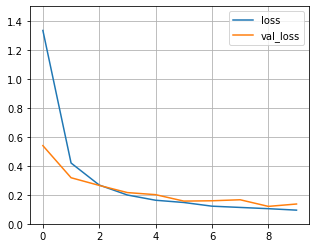

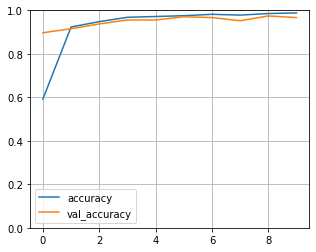

In [13]:
def plt_learning_curve(history, label, minY, maxY):
    data = {}
    data[label] = history[label]
    data["val_"+label] = history["val_"+label]
    pd.DataFrame(data).plot(figsize=(5,4))
    plt.grid(True)
    plt.ylim(minY, maxY)
    plt.show()
    
plt_learning_curve(history.history, "loss", 0, 1.5)
plt_learning_curve(history.history, "accuracy", 0, 1)